# Automated Text Generation & Data-Augmentation for Medicine, Finance, Law, and E-Commerce


![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/webinars_conferences_etc/data_augmentation_and_text_generation_for_finance_legal_medical_and_ecommerce/data_augmentation_and_text_generation_tutorial.ipynb)
 


In [ ]:
! pip install nlu pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 570 kB 15.5 MB/s 
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 532 kB 65.5 MB/s 
     |████████████████████████████████| 199 kB 65.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=26697f5a0fdab74315eebfd86064504a750fe4be2542166a156b9f599f8cd14c
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
import nlu 

gpt2_pipe = nlu.load('gpt2')
gpt2_pipe

gpt2 download started this may take some time.
Approximate size to download 442.7 MB
[OK!]


{'gpt2': GPT2TRANSFORMER_b38120f8fb6b,
 'document_assembler': DocumentAssembler_de4915f4985b}

In [ ]:
generation_result = gpt2_pipe.predict('My Favorite Food is!')
print(generation_result['generated'].iloc[0])

generation_result = gpt2_pipe.predict('My Favorite Food is!')
print(generation_result['generated'].iloc[0])


 My Favorite Food is!

I love the way the food is cooked. I love the texture. I like the way it's cooked. It's a little bit of a challenge to get the right amount of flavor out of it. I'm not
 My Favorite Food is!

I love the way the food is cooked. I love the texture. I like the way it's cooked. It's a little bit of a challenge to get the right amount of flavor out of it. I'm not


In [ ]:
gpt2_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['gpt2'] has settable params:
component_list['gpt2'].setBatchSize(4)                         | Info: Size of every batch | Currently set to : 4
component_list['gpt2'].setIgnoreTokenIds([])                   | Info: A list of token ids which are ignored in the decoder's output | Currently set to : []
component_list['gpt2'].setRepetitionPenalty(1.0)               | Info: The parameter for repetition penalty. 1.0 means no penalty. See `this paper <https://arxiv.org/pdf/1909.05858.pdf>`__ for more details | Currently set to : 1.0
component_list['gpt2'].setTask('')                             | Info: Transformer's task, e.g. 'is it true that'> | Currently set to : 
component_list['gpt2'].setTemperature(1.0)                     | Info: The value used to module the next token probabilities | Currently set to : 1.0
component_list['gpt2'].setTopP(1.0)                            

In [ ]:
# .setDoSample is False by default and makes g enerations deterministic 
gpt2_pipe['gpt2'].setDoSample(True)
generation_result = gpt2_pipe.predict('My Favorite Food is!')
print(generation_result['generated'].iloc[0])

print('_'*50)

generation_result = gpt2_pipe.predict('My Favorite Food is!')
print(generation_result['generated'].iloc[0])


 My Favorite Food is! If you love making things, this is it for you. Don't expect a dish to be super easy! I usually have my entire kitchen made by hand. You can definitely make them super easy by adding chopped almonds to the mix
__________________________________________________
 My Favorite Food is!

So what's all this about? First off, please don't say it's a food thing or anything. The reason is it's just food at a local restaurant. You can probably tell why this might surprise so many


In [ ]:
import pandas as pd 
import nlu

def generate_with_gpt2(gpt_pipe, prompts, log=True):
  df = []
  if isinstance(prompts,list):
    for p in prompts:
      df.append(gpt_pipe.predict(p))
    df = pd.concat(df)
  else : 
    df = gpt_pipe.predict(prompts) 
  if log:
    print_generation_results(df)
  return df 

def print_generation_results(df):
  for idx,row in df[['generated']].reset_index().drop(columns='index').iterrows():
    print(f'Example {idx}: {200*"_"}')
    print(row.values[0])
    print('\n')


# Explore GPT Parameters Play with Paramns

### Sampling Methods


Sampling means we **randomly** draw from a distribution of words. 
The probability distribution is conditioned on all previous tokens in a text to generate the next token. 

By default the distribution contains all words in the vocabulary of GPT2, where many candidates are incorrect to generate.

There are two methods of reshaping and drawing from those distributions : 

1. **Top-K Sampling** Take the k most likely words from the original distribution. Redistribute probability mass among those k words and draw according to the new probabilities.

2. **Top-P Nucleus sampling**  Take smallest possible set of N words, which  together have a probability of p. Redistribute probability mass among those N words and draw according to the new probabilities.



Additionally, both methods can be tweaked ith the following parameters : 

- **temperature** : Parameter of the softmax function which affect the distrubtion computed by the model. The closer we are to 0, the more deterministic the probability will become, distribution tails will become slimmer and outlier word probabilites are more close to 0. Temperature values closer values to 1 make tails of probability fatter which makes outliers more probable and generic results less probable. 


These parameters are shared by all method : 
- **ignoreTokenIds**: A list of token ids which are ignored in the decoder's output (default: [])
- **noRepeatNgramSize**: If set to int > 0, all ngrams of that size can only occur once 
- **repetitionPenalty**: The parameter for repetition penalty. 1.0 means no penalty.  https://arxiv.org/pdf/1909.05858.pdf> 
- **task**:  Transformer's task, e.g. 'is it true that'> (default: , current: generate)

### Play with temperature 
Set Temperature higher to make GPT more random/creative and text less coherent
Temperature > 0  and Temperature <=1
You must set `gpt2.setDoSample(True)` to have non-deterministic results

In [ ]:
generate_with_gpt2(gpt2_pipe, 'Hello my name is Gpt2 I love to')

Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Hello my name is Gpt2 I love to play! I love it, my wife plays me on the other team and we always play on the same team so I can play with any team from wherever I could be.


The game started with




,document,generated
0,Hello my name is Gpt2 I love to,Hello my name is Gpt2 I love to play! I love ...


In [ ]:
gpt2_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['gpt2'] has settable params:
component_list['gpt2'].setBatchSize(4)                         | Info: Size of every batch | Currently set to : 4
component_list['gpt2'].setIgnoreTokenIds([])                   | Info: A list of token ids which are ignored in the decoder's output | Currently set to : []
component_list['gpt2'].setRepetitionPenalty(1.0)               | Info: The parameter for repetition penalty. 1.0 means no penalty. See `this paper <https://arxiv.org/pdf/1909.05858.pdf>`__ for more details | Currently set to : 1.0
component_list['gpt2'].setTask('')                             | Info: Transformer's task, e.g. 'is it true that'> | Currently set to : 
component_list['gpt2'].setTemperature(1.0)                     | Info: The value used to module the next token probabilities | Currently set to : 1.0
component_list['gpt2'].setTopP(1.0)                            

In [ ]:
text = 'Hello my name is GPT2, I love to'
data = [text,text,text]
gpt2_pipe['gpt2'].setDoSample(True)
gpt2_pipe['gpt2'].setTemperature(0.5)
gpt2_pipe['gpt2'].setMaxOutputLength(100)
generate_with_gpt2(gpt2_pipe, data)


Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Hello my name is GPT2, I love to read, and I'm a huge fan of the internet. I'm also a huge geek. I love books and TV, and this is my first time reading a new book. I also love anime. I don't think I've ever read anything before, and yet I'm so excited for this. I've already read some of the manga and anime, and it's been amazing. I think I'll finally get to read a new series.


Example 1: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Hello my name is GPT2, I love to play games, and I am looking forward to the next one.

I've been playing Hearthstone for a long time and I'm really enjoying it. I've seen a lot of great things

,document,generated
0,"Hello my name is GPT2, I love to","Hello my name is GPT2, I love to read, and I'..."
0,"Hello my name is GPT2, I love to","Hello my name is GPT2, I love to play games, ..."
0,"Hello my name is GPT2, I love to","Hello my name is GPT2, I love to play with pl..."


In [ ]:
dfs = [] 
for temp in [1.0, 0.75, 0.5, 0.25, 0.01, 0000.1, ]:
  print(f'{25*"-"} Generation Parameter Temperature {temp} {25*"-"}')
  text = 'Hello my name is GPT2, I love to'
  data = [text,text,text]
  gpt2_pipe['gpt2'].setDoSample(True)
  gpt2_pipe['gpt2'].setTemperature(temp)
  gpt2_pipe['gpt2'].setMaxOutputLength(100)
  generate_with_gpt2(gpt2_pipe, data)


------------------------- Generation Parameter Temperature 1.0 -------------------------
Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Hello my name is GPT2, I love to play, the community I've grown in the past 10 years has had a hard time accepting it, but I feel that I'm doing it right.


GPT2 is coming to PlayStation 4 for PS Vita and PS3 with a PS4 Pro title for release this fall. As per the request for the PS4 update, you can pre-order the beta version here: http://www.gpt2.com/about-us


Example 1: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Hello my name is GPT2, I love to go to all-day hikes. I love seeing the landscape and learning new things but the most im

# GPT2 Text Generation Industry Use-Cases

## Zero-Shot-Learning Applications & Examples

The model has not been trained to predict any of the  classes/predictions we are giving it

### Data2Text for finance assets

We can use the zero-shot learning capabilities of GPT2 and give it a series of asset prices and a description for the performance.

This enables us to automatically generate textual descriptions of asset peformance for human consumption

No need to hire a Data Analyst if GPT2 can your data to you and your users 😉




In [ ]:
gpt2_pipe['gpt2'].setDoSample(True) 
# We want the model to be coherent and logical
# So we decrease Temp, Top-P and TopK 
gpt2_pipe['gpt2'].setTemperature(0.2) 
gpt2_pipe['gpt2'].setTopP(0.5) 
gpt2_pipe['gpt2'].setTopK(20)  
# The Model needs to repeat the previously occuring Tokens
# So we set Penealty to 0 and increase max NGram Size
gpt2_pipe['gpt2'].setRepetitionPenalty(0)  
gpt2_pipe['gpt2'].setNoRepeatNgramSize(5)  

# by default the Document Assebler removes any newlines
# Keeping them improves generation result
gpt2_pipe['document_assembler'].setCleanupMode('disabled')

prompt = \
"""week1 price = [14,13,14,16,18,20,22] -> good
week2 price = [20,18,15,13,10,9,8] -> bad
week3 price = [10,15,13,19,25,30,50] -> good
week4 price = [60,65,73,74,76,77,86] ->"""

# Dynamically set MaxOutputLength, based on prompt we give it 
# By giving it more Generation space, we can have a summary after the prediction
gpt2_pipe['gpt2'].setMaxOutputLength(len(prompt)+5)


gpt2_pipe.print_info()
print(gpt2_pipe.predict(prompt).generated[0])


The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['gpt2'] has settable params:
component_list['gpt2'].setBatchSize(4)                           | Info: Size of every batch | Currently set to : 4
component_list['gpt2'].setIgnoreTokenIds([])                     | Info: A list of token ids which are ignored in the decoder's output | Currently set to : []
component_list['gpt2'].setRepetitionPenalty(0.0)                 | Info: The parameter for repetition penalty. 1.0 means no penalty. See `this paper <https://arxiv.org/pdf/1909.05858.pdf>`__ for more details | Currently set to : 0.0
component_list['gpt2'].setTask('')                               | Info: Transformer's task, e.g. 'is it true that'> | Currently set to : 
component_list['gpt2'].setTemperature(0.2)                       | Info: The value used to module the next token probabilities | Currently set to : 0.2
component_list['gpt2'].setTopP(0.5)                  

### Treatment Reccomendations for Medicine

In [ ]:
gpt2_pipe['gpt2'].setDoSample(True) 
# We want the model to be coherent and logical
# So we decrease Temp, Top-P and TopK 
gpt2_pipe['gpt2'].setTemperature(0.5) 
gpt2_pipe['gpt2'].setTopP(0.8) 
gpt2_pipe['gpt2'].setTopK(50)  
# The Model needs to repeat the previously occuring TOkens
# So we set Penealty to 0 
gpt2_pipe['gpt2'].setRepetitionPenalty(1)  
gpt2_pipe['gpt2'].setNoRepeatNgramSize(3)  

# by default the Document Assebler removes any newlines
# Keeping them improves generation result
gpt2_pipe['document_assembler'].setCleanupMode('disabled')

prompt = \
"""Cough -> Promethazine
Headache -> Naproxen
Nose Bleeding -> Tranexamic acid
Diarrhea ->  """

# Dynamically set MaxOutputLength, based on prompt we give it 
# By giving it more Generation space, we can have a summary after the prediction
gpt2_pipe['gpt2'].setMaxOutputLength(len(prompt)+15)


gpt2_pipe.print_info()
print(gpt2_pipe.predict(prompt).generated[0])


The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['gpt2'] has settable params:
component_list['gpt2'].setBatchSize(4)                           | Info: Size of every batch | Currently set to : 4
component_list['gpt2'].setIgnoreTokenIds([])                     | Info: A list of token ids which are ignored in the decoder's output | Currently set to : []
component_list['gpt2'].setRepetitionPenalty(1.0)                 | Info: The parameter for repetition penalty. 1.0 means no penalty. See `this paper <https://arxiv.org/pdf/1909.05858.pdf>`__ for more details | Currently set to : 1.0
component_list['gpt2'].setTask('')                               | Info: Transformer's task, e.g. 'is it true that'> | Currently set to : 
component_list['gpt2'].setTemperature(0.5)                       | Info: The value used to module the next token probabilities | Currently set to : 0.5
component_list['gpt2'].setTopP(0.8)                  

## SEO Text / Content Writing / Copy Writing
Lets generate some texts for our new imaginary shopify store!
We will sell some hoodies, soap and beard products.

Based on some base templates, we can generate high quality marketing/seo texts

![image](https://www.awai.com/_img/content/what-is-copywriting/title_page_image.png)

In [ ]:
# from https://www.shopify.com/blog/8211159-9-simple-ways-to-write-product-descriptions-that-sell 

# Lets define some base texts, from which we will generate new texts

hoodie = """Can’t stop buying plants? Unbeleafable. Don’t worry—us too! Cover yourself in your favourite obsession in our NEW I Love Plants Oodie! """

soap  = """Made with real pine extract, this all-star bar is as tough as a freshly cut bat. 
A true MVP of the shower, this heavy-hitter knocks out grime with its gritty composition and ultra-manly, woodsy scent."""

beard = """ Whatever your style is, Beardbrand Styling Balm is versatile enough to handle it.
Designed to work with all hair types, it provides enough hold to keep thick, curly hair under control, """
gpt2_pipe['gpt2'].setTemperature(1)
gpt2_pipe['gpt2'].setDoSample(True)



GPT2TRANSFORMER_b38120f8fb6b

#### Marketing Texts for Hoodies

In [ ]:
# Lets generate some marketing texts for our hoodies
generate_with_gpt2(gpt2_pipe, [hoodie,hoodie,hoodie,hoodie,hoodie,hoodie])


Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Cant stop buying plants? Unbeleafable. Dont worryus too! Cover yourself in your favourite obsession in our NEW I Love Plants Oodie!

Made in UK for the largest selection, this will come in a huge container so you don't burn your hands on it - even if it's just your eyes. Great for parties and parties around the home....this is perfect for parties or when you are looking to get your feet wet and bright...this is an


Example 1: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Cant stop buying plants? Unbeleafable. Dont worryus too! Cover yourself in your favourite obsession in our NEW I Love Plants Oodie!


Example 2: _________

,document,generated,unique_word_score
0,Can’t stop buying plants? Unbeleafable. Don’t ...,Cant stop buying plants? Unbeleafable. Dont w...,0.8157895
0,Can’t stop buying plants? Unbeleafable. Don’t ...,Cant stop buying plants? Unbeleafable. Dont w...,0.9545455
0,Can’t stop buying plants? Unbeleafable. Don’t ...,Cant stop buying plants? Unbeleafable. Dont w...,0.8333333
0,Can’t stop buying plants? Unbeleafable. Don’t ...,Cant stop buying plants? Unbeleafable. Dont w...,0.9041096
0,Can’t stop buying plants? Unbeleafable. Don’t ...,Cant stop buying plants? Unbeleafable. Dont w...,0.8913043
0,Can’t stop buying plants? Unbeleafable. Don’t ...,Cant stop buying plants? Unbeleafable. Dont w...,0.8846154


#### Marketing Texts for Soap

In [ ]:
# Lets generate some marketing texts for our soap
generate_with_gpt2(gpt2_pipe, [soap,soap,soap,soap,soap,soap])


Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Made with real pine extract, this all-star bar is as tough as a freshly cut bat. A true MVP of the shower, this heavy-hitter knocks out grime with its gritty composition and ultra-manly, woodsy scent.

The Original Bar

Ingredients: Water, Cinnamon Starch, Natural Balance

Dimensions: 6

Calories: 39 grams

Fat: 10 grams
 of carbs per serving: 4.8 grams of protein

How


Example 1: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Made with real pine extract, this all-star bar is as tough as a freshly cut bat. A true MVP of the shower, this heavy-hitter knocks out grime with its gritty composition and ultra-manly, woodsy scent.

,document,generated,unique_word_score
0,"Made with real pine extract, this all-star bar...","Made with real pine extract, this all-star ba...",0.9107143
0,"Made with real pine extract, this all-star bar...","Made with real pine extract, this all-star ba...",0.8333333
0,"Made with real pine extract, this all-star bar...","Made with real pine extract, this all-star ba...",0.8181818
0,"Made with real pine extract, this all-star bar...","Made with real pine extract, this all-star ba...",0.9245283
0,"Made with real pine extract, this all-star bar...","Made with real pine extract, this all-star ba...",0.7857143
0,"Made with real pine extract, this all-star bar...","Made with real pine extract, this all-star ba...",0.9166667


#### Marketing Texts for beard products

In [ ]:
# Lets generate some marketing texts for our beard products
generate_with_gpt2(gpt2_pipe, [beard,beard,beard,beard,beard,beard])


Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Whatever your style is, Beardbrand Styling Balm is versatile enough to handle it. Designed to work with all hair types, it provides enough hold to keep thick, curly hair under control, without compromising the beauty and stability of your natural hair.

Flexible and durable, Beard Brand Styling products will stay up through the day for long-lasting results. So why is BeardBrand Styling so important?

With Beard Brand, our aim is to create unique and highly-custom


Example 1: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Whatever your style is, Beardbrand Styling Balm is versatile enough to handle it. Designed to work with 

,document,generated,unique_word_score
0,"Whatever your style is, Beardbrand Styling Bal...","Whatever your style is, Beardbrand Styling Ba...",0.8108108
0,"Whatever your style is, Beardbrand Styling Bal...","Whatever your style is, Beardbrand Styling Ba...",0.8170732
0,"Whatever your style is, Beardbrand Styling Bal...","Whatever your style is, Beardbrand Styling Ba...",0.7901235
0,"Whatever your style is, Beardbrand Styling Bal...","Whatever your style is, Beardbrand Styling Ba...",0.7882353
0,"Whatever your style is, Beardbrand Styling Bal...","Whatever your style is, Beardbrand Styling Ba...",0.7692308
0,"Whatever your style is, Beardbrand Styling Bal...","Whatever your style is, Beardbrand Styling Ba...",0.7468354


## Generate Product Reccomendations

We can start a base list of top 10 anything and GPT2 will complete it for us!      
This is very useful to reccomendation and search engines.

![image](https://nosto.com/wp-content/uploads/beerhawk-2-1-1024x709.png)

### Top 10 Movie List

In [ ]:
movie_list = """My top 10 movie list : 
1. The Matrix 1
2. The Terminator 1
3. Scarface
4."""

gpt2_pipe['gpt2'].setTemperature(1)
gpt2_pipe['gpt2'].setMaxOutputLength(200)
gpt2_pipe['gpt2'].setDoSample(True)
generate_with_gpt2(gpt2_pipe, movie_list)



Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 My top 10 movie list : 1. The Matrix 1 2. The Terminator 1 3. Scarface 4. The Hunger Games 4. Inside Amy Schumer 1 5. The Wolf of Wall Street 5. Red Dead Redemption 5. Empire 1 6. The Avengers 1 7. The Purge - Bonus Episode 1 (Featuring Chris Roberts ) 8. American Horror Story: Hotel (Original Soundtrack) 1/10: The Purging of Mr. Holmes - Soundtrack 2/10 6. A Better Tomorrow 3/10 7. House of Cards 4/10 8. The Blacklist 5/10 9. I Am Legend 6/10 10. The Walking Dead 2/50 11. Black Mirror 2/100 12. Big Love 2/150 13. The Hobbit 4/100 14. The LEGO Movie - A Song of Ice and Fire (Original Music Version) 17 * * The Grand Budapest Hotel 4. Snow White & the Seven Dwarfs 5. Elle: The Return of Eleanor 5.




,document,generated,unique_word_score
0,My top 10 movie list : 1. The Matrix 1 2. The ...,My top 10 movie list : 1. The Matrix 1 2. The...,0.7375887


How **not** to generate text with GPT2

Since every new word is conditioned on every previous **character**, things like **white spaces** and **new lines** can skew the sampling distribution into an unintended direction

In [ ]:
# NOTE! We have malformed the input text and added a newline. 
# This will Confuse GPT2, it might think the list is over and probability distribution changes accordingly
movie_list = """My Top 10 movie list : 
1. The Matrix 1
2. The Terminator 1
3. Scarface
4.


"""
gpt2_pipe['gpt2'].setTemperature(1)
gpt2_pipe['gpt2'].setDoSample(True)
generate_with_gpt2(gpt2_pipe, movie_list)



Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 My Top 10 movie list : 1. The Matrix 1 2. The Terminator 1 3. Scarface 4. X-Men 4 5. Batman V Superman 5 6. The Flash 7 8. Suicide Squad 9 10. Pirates of the Caribbean

The list consists of movies that may be part of a trilogy of movies or a single movie. If no trilogy includes a Batman movie, then the only film listed will be The Matrix. Below is the list of films that are made up of several movies.

1) Thor: The Dark World: An Academy Award Nomination

2) Supernatural 1

3) The Hunger Games: Catching Fire

4) The Lion King 2




,document,generated,unique_word_score
0,My Top 10 movie list : 1. The Matrix 1 2. The ...,My Top 10 movie list : 1. The Matrix 1 2. The...,0.7766990


In [ ]:
# This is how it should be done
movie_list = """My Top 10 worst movie list : 
1. The Matrix 4
2. Jack and Jill
3. Super Mario Bros. (1993)
4. """
gpt2_pipe['gpt2'].setTemperature(1)
gpt2_pipe['gpt2'].setDoSample(True)
generate_with_gpt2(gpt2_pipe, movie_list)



Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 My Top 10 worst movie list : 1. The Matrix 4 2. Jack and Jill 3. Super Mario Bros. (1993) 4. Frozen 5. The Hobbit (2001) 6. The Hunger Games (2000) 7. Harry Potter and the Half-Blood Prince 8. Inception 9. Frozen (2004)

Awards

In addition to being nominated for an Academy Award, all 20 movies in the list received Oscar nominations from members of the media. The list also includes the Academy Awards, Screen Actors Guild Award nominations, the Academy Award for Best Picture Awards, the Screen Actoring Awards, and The Hollywood Reporter's Best Picture nomination.

Directors: Robert Downey Jr., Colin Trevorrow, Michael Green, Charles Roven, Robert J. Abrams

Writer: Mark Wahlberg

Director: Andrew Stanton

Starring: Anna Paquin, Benicio Del Toro, Daniel Day-Lewis

Release Date: 

,document,generated,unique_word_score
0,My Top 10 worst movie list : 1. The Matrix 4 2...,My Top 10 worst movie list : 1. The Matrix 4 ...,0.8048780


### Top 10 Game List

In [ ]:
game_list = """My Top 10 video games of all time list : 
1. Half-Life 2
2. Super Smash Bros Melee
3. Portal
4. """
gpt2_pipe['gpt2'].setTemperature(1)
gpt2_pipe['gpt2'].setDoSample(True)
generate_with_gpt2(gpt2_pipe, game_list)



Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 My Top 10 video games of all time list : 1. Half-Life 2 2. Super Smash Bros Melee 3. Portal 4. Super Mario 3D World 5. Fire Emblem: Awakening 6. Pokemon Generations and the other 2:

1. Fire & Dark 2 2 3. Pokemon XD: Gale of Darkness 3 4. Dragon Quest XI Fire Emblem Heroes 6. Super Stardust Crusaders 8. Far Cry Primal 9. Deus Ex: Mankind Divided 10. Super Street Fighter IV - Best Street Fighter VI - Capcom Vs. SNK 2011-10-03 01:05:39


Bizarre Creations - Video Game Scoreboards for Nintendo 3DS

Click Here Now

Play in this site for your Nintendo 3D TV, TV, or portable device to see the best gameplay videos from all these games. Find video games that have the highest scoreboard scores, top scoreboard entries, and the best video from the Super Nintendo Super Nintendo 5 game ser

,document,generated,unique_word_score
0,My Top 10 video games of all time list : 1. Ha...,My Top 10 video games of all time list : 1. H...,0.7310345


### Top 10 Book List

In [ ]:
game_list = """My Top 10 books of all time list : 
1. 1964
2. Moby Dick
3. robinson crusoe
4. """
gpt2_pipe['gpt2'].setTemperature(1)
gpt2_pipe['gpt2'].setDoSample(True)
generate_with_gpt2(gpt2_pipe, game_list)



Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 My Top 10 books of all time list : 1. 1964 2. Moby Dick 3. robinson crusoe 4. Blonde Vapour 5. Kitten by Mary and Bill 6. Love & Sex 7. The Princess Bride 8. The Lord of the Rings 9. Harry Potter 10. I'm Going Home 11. Man Without Bodies . . . 12. Harry Styles 12. Temptations ... 13. The Lion King 14. The Wizard of Oz 15. J.K. Rowling 16. The Long Goodbye 17. Unbelievable Things 18. The Diary of Anne Rice 19. The Art of Misadventure 20. Jumanji for Girls 21. The King to the Rescue 22. The Book of Life 23. A Diary of a Love Story 24. Bollywood 10/11/16 25. The Adventures of Dr. N (or any other book you'd like the people to buy if they like The Dark Knight and all…) 26. A Christmas Carol 27




,document,generated,unique_word_score
0,My Top 10 books of all time list : 1. 1964 2. ...,My Top 10 books of all time list : 1. 1964 2....,0.7931034


## Song Lyrics
![image](https://nationaltoday.com/wp-content/uploads/2021/05/Sing-Out.jpg)

#### Last Christmas

In [ ]:
last_christmas = """
Last Christmas, I gave you my heart
But the very next day, you gave it away
This year, to save me from tears
I'll give it to someone special
"""

gpt2_pipe['gpt2'].setMaxOutputLength(1000)
generate_with_gpt2(gpt2_pipe, last_christmas)

Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Last Christmas, I gave you my heart But the very next day, you gave it away This year, to save me from tears I'll give it to someone special These are the days that we're together, when we smile, when it isn't sad and when we don't think about what's in the world for days until it's over So if I'm gonna go, I have to go This month that I'm not gonna be afraid For the second time it'll be with you And I'm going to try to take it all.

What do you mean that?

I try to go through those moments, I try to make them so that I can give them out I'm trying to take them down And it takes me, you know, it's like a gift, you can never forget and I feel so grateful for it.
, but, there's a feeling in the air, maybe one I've gotten to a point where I just don't cry, because we really are t

,document,generated,unique_word_score
0,"Last Christmas, I gave you my heart But the ve...","Last Christmas, I gave you my heart But the v...",0.4331683


#### Fresh prince of GPT

In [ ]:
bel_air = """
Now, this is a story all about how
My life got flipped-turned upside down
And I'd like to take a minute
Just sit right there
I'll tell you how I became the prince of a town called Bel-Air
"""

gpt2_pipe['gpt2'].setMaxOutputLength(1000)
generate_with_gpt2(gpt2_pipe, bel_air)

Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Now, this is a story all about how My life got flipped-turned upside down And I'd like to take a minute Just sit right there I'll tell you how I became the prince of a town called Bel-Air

My childhood friend, a musician, named me when I was an infant. I could be anywhere. My parents were great musicians, who didn't care if I was a musician or not. He had a small musical brain and he could play. I was always learning my song. He listened to this music like an ankh. I knew nothing about the different sounds that pop in and out like I played in a band. There was nothing real about him except the melodies that I was seeing. He played his music, listened to it, and became "great." I had never heard the "Great Teacher!" song. I came to love him as soon as I heard it, at first. I be

,document,generated,unique_word_score
0,"Now, this is a story all about how My life got...","Now, this is a story all about how My life go...",0.4252336


#### GPT Jackson

In [ ]:
thriller_lyrics = """
They told him, "Don't you ever come around here"
"Don't wanna see your face, you better disappear"
The fire's in their eyes and their words are really clear
So beat it, just beat it
You better run, you better do what you can
Don't wanna see no blood, don't be a macho man
You wanna be tough, better do what you can
So beat it, but you wanna be bad
Just beat it (beat it), beat it (beat it)
No one wants to be defeated
Showin' how funky and strong is your fight
It doesn't matter who's wrong or right
Just beat it (beat it)
Just beat it (beat it)
"""


gpt2_pipe['gpt2'].setMaxOutputLength(500)
generate_with_gpt2(gpt2_pipe, thriller_lyrics)

Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 They told him, "Don't you ever come around here" "Don't wanna see your face, you better disappear" The fire's in their eyes and their words are really clear So beat it, just beat it You better run, you better do what you can Don't wanna see no blood, don't be a macho man You wanna be tough, better do what you can So beat it, but you wanna be bad Just beat it (beat it), beat it (beat it) No one wants to be defeated Showin' how funky and strong is your fight It doesn't matter who's wrong or right Just beat it (beat it) Just beat it (beat it)

RAW Paste Data

You're gonna die If you don't know it, then you're going to die Showin, this isn't real, I'm serious Your fuckin' a man, man You'll die this fuckin' time, you die this time. You got better than bad You gon get me dead, we'll

,document,generated,unique_word_score
0,"They told him, ""Don't you ever come around her...","They told him, ""Don't you ever come around he...",0.5452128


#### Real Slim GPT

In [ ]:
real_slim_shady = """
May I have your attention, please?
May I have your attention, please?
Will the real Slim Shady please stand up?
I repeat, will the real Slim Shady please stand up?
We're gonna have a problem here?
Y'all act like you never seen a white person before
Jaws all on the floor like Pam, like Tommy just burst in the door
And started whoopin' her ass worse than before
They first were divorced, throwin' her over furniture (ah!)
It's the return of the, oh wait, no way, you're kidding
He didn't just say what I think he did, did he?
And Dr. Dre said-, nothing you idiots
Dr. Dre's dead, he's locked in my basement (haha)
"""



gpt2_pipe['gpt2'].setMaxOutputLength(1000)
generate_with_gpt2(gpt2_pipe, real_slim_shady)

Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 May I have your attention, please? May I have your attention, please? Will the real Slim Shady please stand up? I repeat, will the real Slim Shady please stand up? We're gonna have a problem here? Y'all act like you never seen a white person before Jaws all on the floor like Pam, like Tommy just burst in the door And started whoopin' her ass worse than before They first were divorced, throwin' her over furniture (ah!) It's the return of the, oh wait, no way, you're kidding He didn't just say what I think he did, did he? And Dr. Dre said-, nothing you idiots Dr. Dre's dead, he's locked in my basement (haha) A dead man who's been outed in this city for over a year. Or, like Mr. Slim, he got this big ass deal and the name Slim Shader was right by him, that he was a thug And this 

,document,generated,unique_word_score
0,"May I have your attention, please? May I have ...","May I have your attention, please? May I have...",0.4375788


#### GPT Rap God Bot

In [ ]:
rap_god_lyrics = """
Look, I was gonna go easy on you not to hurt your feelings
But I'm only going to get this one chance (six minutes-, six minutes-)
Something's wrong, I can feel it (six minutes, Slim Shady, you're on!)
Just a feeling I've got, like something's about to happen, but I don't know what
If that means what I think it means, we're in trouble, big trouble
And if he is as bananas as you say, I'm not taking any chances
You are just what the doc ordered
I'm beginnin' to feel like a Rap God, Rap God
All my people from the front to the back nod, back nod
Now, who thinks their arms are long enough to slap box, slap box?
They said I rap like a robot, so call me Rap-bot """



gpt2_pipe['gpt2'].setMaxOutputLength(1000)
generate_with_gpt2(gpt2_pipe, rap_god_lyrics)

Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Look, I was gonna go easy on you not to hurt your feelings But I'm only going to get this one chance (six minutes-, six minutes-) Something's wrong, I can feel it (six minutes, Slim Shady, you're on!) Just a feeling I've got, like something's about to happen, but I don't know what If that means what I think it means, we're in trouble, big trouble And if he is as bananas as you say, I'm not taking any chances You are just what the doc ordered I'm beginnin' to feel like a Rap God, Rap God All my people from the front to the back nod, back nod Now, who thinks their arms are long enough to slap box, slap box? They said I rap like a robot, so call me Rap-bot, but you're a very different animal?

RAW Paste Data

Danger in the Water Don't you like my dick, my ass, my cock Is it your 

,document,generated,unique_word_score
0,"Look, I was gonna go easy on you not to hurt y...","Look, I was gonna go easy on you not to hurt ...",0.5968379


## Fiction Writing

![image](https://botnik.org/content/hp01.jpg)

You can write and sell [books](https://botnik.org/content/harry-potter.html) 

#### Fantasy Stories

In [ ]:

silly_story = """
Blue creatuers have been found in underground cavern in Maxico, which are mysteriously filled with peanut butter pockets.
These pockets are rich in proteins and enabled a civilization of these creatures to flurish and 
build technologies which have surpassed human understanding. Scientist have studied these
creataures and found incredible discoveries, including their mastery of the Spanish language and perfect Tacos!"""


gpt2_pipe['gpt2'].setMaxOutputLength(1000)
generate_with_gpt2(gpt2_pipe, silly_story)

Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 Blue creatuers have been found in underground cavern in Maxico, which are mysteriously filled with peanut butter pockets. These pockets are rich in proteins and enabled a civilization of these creatures to flurish and build technologies which have surpassed human understanding. Scientist have studied these creataures and found incredible discoveries, including their mastery of the Spanish language and perfect Tacos! The ancient secret to their building of utensils, which have been discovered by archaeologists worldwide and scientists living in New York City, Los Angeles, Paris, Switzerland, India, Italy, Hong Kong, China and other places was a secret sauce which we do not fully understand, so no one can believe that these new discoveries will allow us to see how they might be 

,document,generated,unique_word_score
0,Blue creatuers have been found in underground ...,Blue creatuers have been found in underground...,0.6981132


#### Lovecraftian Horror Stories 

In [ ]:
cthulu_intro = """
The most merciful thing in the world, I think, is the inability of the human mind to correlate all its contents. 
We live on a placid island of ignorance in the midst of black seas of infinity, and it was not meant that we should voyage far. 
The sciences, each straining in its own direction, have hitherto harmed us little"""

gpt2_pipe['gpt2'].setMaxOutputLength(1000)
generate_with_gpt2(gpt2_pipe, cthulu_intro)

Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 The most merciful thing in the world, I think, is the inability of the human mind to correlate all its contents. We live on a placid island of ignorance in the midst of black seas of infinity, and it was not meant that we should voyage far. The sciences, each straining in its own direction, have hitherto harmed us little by little; but now it is so much greater a threat to our very lives that we ought not merely to resist it, but to give up to it what we have. The only real hope is a world free from the superstitions, illusions and illusions of the past in which our humanity has been made, and inhabited by the children of the people who lived around us, in accordance with the same moralism and superstition, as we live today; and of these we know the world will never become so.

,document,generated,unique_word_score
0,"The most merciful thing in the world, I think,...","The most merciful thing in the world, I think...",0.3911565


#### Re-Write movie scripts

In [ ]:
the_matrix_script = """
The Architect: Hello, Neo.

Neo: Who are you?

The Architect: I am the Architect. I created the matrix. I've been waiting for you. 
You have many questions, and although the process has altered your consciousness, you remain irrevocably human. 
Ergo, some of my answers you will understand, and some of them you will not. 
Concordantly, while your first question may be the most pertinent, you may or may not realize it is also irrelevant.

Neo: Why am I here?

The Architect: """

gpt2_pipe['gpt2'].setMaxOutputLength(1000)
generate_with_gpt2(gpt2_pipe, the_matrix_script)

Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 The Architect: Hello, Neo. Neo: Who are you? The Architect: I am the Architect. I created the matrix. I've been waiting for you. You have many questions, and although the process has altered your consciousness, you remain irrevocably human. Ergo, some of my answers you will understand, and some of them you will not. Concordantly, while your first question may be the most pertinent, you may or may not realize it is also irrelevant. Neo: Why am I here? The Architect: To let you go. You will need to prove to yourself that there is a way out, as I can give you a solution. That was what I was looking for, and now you have the answer. But where is my life left to go? Neo: There is only one choice. The Architect. Neo's name is Giro: The Architect? The Architecture: It is called the M

,document,generated,unique_word_score
0,"The Architect: Hello, Neo. Neo: Who are you? T...","The Architect: Hello, Neo. Neo: Who are you? ...",0.4321133


## GPT for Programing Code


![image](https://static01.nyt.com/images/2022/04/04/multimedia/15ai-nocode/15ai-nocode-mobileMasterAt3x.jpg)

###  Scala

In [ ]:
# Hello world in Scala
scala_code = """
object Hello {
    def main(args: Array[String]) = {
        println("Hello, world")
    }
}
"""
gpt2_pipe['gpt2'].setMaxOutputLength(1000)

gpt2_pipe['gpt2'].setTemperature(1)
gpt2_pipe['gpt2'].setDoSample(True)
generate_with_gpt2(gpt2_pipe, scala_code)



Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 object Hello { def main(args: Array[String]) = { println("Hello, world") } }

To get the global state of the model in a function called Hello that evaluates it, you can use the functions array() and getInstance() to get the state of its parent, and also to get its state that has been updated.

def getInstance(args): self.model = model def update(args, updates): return _model.load() if __name__ == '__main__': ... def main(): print("Hello world") main()

import random def myModel(args...): print("my model") myModel = Random.class print("models: {:r} {:h} {:s}") mymodel.setState(HelloWorld("world"))

As you can verify, I only used getInstance to get global state from the constructor of a main method that fires any subsequent calls to that method. So if you call a main() that fire

,document,generated,unique_word_score
0,object Hello { def main(args: Array[String]) =...,object Hello { def main(args: Array[String]) ...,0.5796703


### Python

In [ ]:
# adding 3 numbers in python
py_code = """
def my_func(a,b,c):
  return a+b+c
"""
gpt2_pipe['gpt2'].setMaxOutputLength(1000)
gpt2_pipe['gpt2'].setTemperature(1)
gpt2_pipe['gpt2'].setDoSample(True)
generate_with_gpt2(gpt2_pipe, py_code)



Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 def my_func(a,b,c): return a+b+c

The "use_func" function (also available locally, e.g., if the file argument should be "my_functo" , in the case of a directory), creates a new function that has been explicitly created: create_executable() by default. Using a separate function allows us to use the same syntax for any given function.

Use the code in the above examples more carefully: to have the same effect for all functions you use, you have to use it with the same name. The code in here is taken from the code for "Create a function: function" in the directory that you put it in.




,document,generated,unique_word_score
0,"def my_func(a,b,c): return a+b+c","def my_func(a,b,c): return a+b+c\n\nThe ""use_...",0.7029703


In [ ]:
# breadth-first search 
bfs_python_code = """
def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
"""


gpt2_pipe['gpt2'].setMaxOutputLength(1000)
gpt2_pipe['gpt2'].setTemperature(1)
gpt2_pipe['gpt2'].setDoSample(True)
generate_with_gpt2(gpt2_pipe, bfs_python_code)



Example 0: ________________________________________________________________________________________________________________________________________________________________________________________________________
 def bfs(visited, graph, node): visited.append(node) queue.append(node) while queue: s = queue.pop(0) print (s, end = " ") for neighbour in graph[s]: if neighbour not in visited: visited.append(neighbour) queue.append(neighbour) return queue.split(self.visited_node) else: s.append_to(node), neighbour.append to(neighed_trail, bfs.reverse()) queue.splice(self._visited).substr(1, 1)

Skeletal.render() .render(a = {}) .render() + (a = {});

When building on a new source of data, we can reuse our previous build and add new views. The following example has no view, but some methods to render items, which then need to update the view later.

@Override public void render(List<Item<Void> > v) { System.out.println("Items"); Void.add(v); } @Override public List<Item> getTasks(list<Item<?>

,document,generated,unique_word_score
0,"def bfs(visited, graph, node): visited.append(...","def bfs(visited, graph, node): visited.append...",0.6372549


# Data Augmentation
Analogous to how Machine Vision Data Scientists can augment their datasets and models by generating new traning examples, there exist many techniques in NLP to achieve the same goal.

- This is especially useful to create smaller and faster models than the Large Language model we will be using for this. 
- Also since the Large Language Model is eduacted on a variety of topics by training on huge corpuses on text, we can leverage it to generate text in settings where we do not have a lot of access to data or a class imbalance 


This segment demonstrates one of possible many approaches and gives a simple re-usable framework to explore other methods. 


see [A Survey of Data Augmentation Approaches for NLP](https://arxiv.org/pdf/2105.03075.pdf) for a detailed breakdown and analysis of many other Augmentation Methods.




## Data Augmentation example for news Classifier Dataset

We will use 90% of the data of testing and only 10% for training to similate a scenario where we would have access to little data

In [ ]:
%%capture 
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_train.csv
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

test_path = '/content/news_category_test.csv'
base_dataset = pd.read_csv(test_path).iloc[:10000]
base_dataset.columns=['y','text']

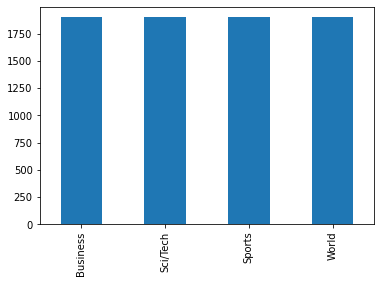

In [ ]:
base_dataset.y.value_counts().plot.bar()

In [ ]:
base_dataset.head(5)

,y,text
0,Business,Unions representing workers at Turner Newall...
1,Sci/Tech,"TORONTO, Canada A second team of rocketeer..."
2,Sci/Tech,A company founded by a chemistry researcher a...
3,Sci/Tech,It's barely dawn when Mike Fitzpatrick starts...
4,Sci/Tech,Southern California's smog fighting agency we...


In [ ]:
import nlu
gpt2_pipe = nlu.load('gpt2')
gpt2_pipe

gpt2 download started this may take some time.
Approximate size to download 442.7 MB
[OK!]


{'gpt2': GPT2TRANSFORMER_b38120f8fb6b,
 'document_assembler': DocumentAssembler_63df80543ee3}

## Vanilla Training

### Base Dataset Preperation

In [ ]:
# Let's make sure the label is equeally distributed in train/test
# We take 500 in total for each class in our base dataset
n_per_class_total = 1000
base_dataset = base_dataset.groupby('y').head(n_per_class_total)
# We use a 0.85 test/train split to simulate a low data ressource scenario
# We draw equally from each labell so data stays balanced
train_test_frac = 0.90
train_dfs = []
test_dfs = []
for label in base_dataset.y.unique():
  train_df, test_df = train_test_split(base_dataset[base_dataset.y == label],test_size = train_test_frac)
  test_dfs.append(test_df)
  train_dfs.append(train_df)


test_df = pd.concat(test_dfs)
train_df = pd.concat(train_dfs)

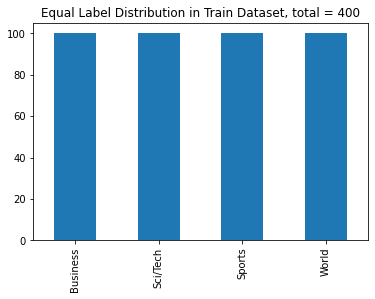

In [ ]:
train_df.y.value_counts().plot.bar(title=f'Equal Label Distribution in Train Dataset, total = {train_df.shape[0]}')

### Train a new News Classifier from the base dataset

We will call this the vanilla model and vanilla dataset, since did not modify it yet

In [ ]:
# Create a unfitted classifier and set some training paramters
unfitted_classifier = nlu.load('train.classifier')
unfitted_classifier['trainable_classifier_dl'].setMaxEpochs(10)
unfitted_classifier['trainable_classifier_dl'].setLr(0.0005)
unfitted_classifier['trainable_classifier_dl'].setBatchSize(64)
unfitted_classifier['trainable_classifier_dl'].setDropout(0.5)
unfitted_classifier.print_info()

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['trainable_classifier_dl'] has settable params:
component_list['trainable_classifier_dl'].setMaxEpochs(10)     | Info: Maximum number of epochs to train | Currently set to : 10
component_list['trainable_classifier_dl'].setLr(0.0005)        | Info: Learning Rate | Currently set to : 0.0005
component_list['trainable_classifier_dl'].setBatchSize(64)     | Info: Batch size | Currently set to : 64
component_list['trainable_classifier_dl'].setDropout(0.5)      | Info: Dropout coefficient | Currently set to : 0.5
component_list['trainable_classifier_dl'].setEnableOutputLogs(True)  | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
>>> component_list['bert_sentence_embeddings@sent_small_bert_L2_128'] has settable params:
component_list['be

In [ ]:
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# Since there are no
fitted_vanilla_classifier = unfitted_classifier.fit(train_df)

### Training Dataset Metrics

In [ ]:
# predict with the trained pipeline on dataset and get predictions
train_preds = fitted_vanilla_classifier.predict(train_df)
train_preds[['classifier_dl','y','text']].head(5)

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,classifier_dl,y,text
0,Business,Business,Vodafone said today it remained keen on purcha...
1,Business,Business,The Senate is expected to vote on the overall ...
2,Business,Business,term suitor Foodland (FOA) yesterday with an a...
3,Sports,Business,WASHINGTON : The Federal Reserve #39;s policy ...
3,Sports,Business,WASHINGTON : The Federal Reserve #39;s policy ...


In [ ]:
# Evaluate all predications
train_metrics_not_augmented = classification_report(train_preds['y'], train_preds['classifier_dl'])
print(train_metrics_not_augmented)

              precision    recall  f1-score   support

    Business       0.72      0.61      0.66       133
    Sci/Tech       0.72      0.77      0.74       155
      Sports       0.80      0.95      0.87       138
       World       0.83      0.73      0.78       134

    accuracy                           0.77       560
   macro avg       0.77      0.76      0.76       560
weighted avg       0.77      0.77      0.76       560



### Test Dataset Metrics

In [ ]:
# Get Predictions on Test Dataset, not seen by model before 
test_preds = fitted_vanilla_classifier.predict(test_df,output_level = 'document')

test_preds[['classifier_dl','y','text']].head(5)

,classifier_dl,y,text
0,Business,Business,California lawyers who reached a \$1.1 billion...
1,Sci/Tech,Business,"DreamWorks SKG, the studio that created the q..."
2,Business,Business,"Nike Inc. (NKE.N: Quote, Profile, Research) on..."
3,Business,Business,Automaker DaimlerChrysler AG said Wednesday it...
4,Business,Business,Online holiday shoppers this year are making c...


In [ ]:

# Evaluate all test predictions and print them with test predictions for comparision
test_metrics_not_augmented = classification_report(test_preds['y'], test_preds['classifier_dl'])

sep = '_'*50
print(sep,'Metrics on Test Dataset of model trained on vanilla dataset',sep)
print(test_metrics_not_augmented)

print(sep,'Metrics on vanilla Train datataset of model trained on vanilla dataset',sep)
print(train_metrics_not_augmented)



__________________________________________________ Metrics on Test Dataset of model trained on vanilla dataset __________________________________________________
              precision    recall  f1-score   support

    Business       0.75      0.75      0.75       900
    Sci/Tech       0.80      0.69      0.74       900
      Sports       0.86      0.93      0.89       900
       World       0.80      0.85      0.82       900

    accuracy                           0.80      3600
   macro avg       0.80      0.80      0.80      3600
weighted avg       0.80      0.80      0.80      3600

__________________________________________________ Metrics on vanilla Train datataset of model trained on vanilla dataset __________________________________________________
              precision    recall  f1-score   support

    Business       0.72      0.61      0.66       133
    Sci/Tech       0.72      0.77      0.74       155
      Sports       0.80      0.95      0.87       138
       World 

## Aumented Training

### Augmented Dataset Creation
Lets create the prompts we will feed to GPT2.      
We just take the original label + the first 15 characters       
Created pr ompts have the pattern `<y>:<x[:n]>`  where x is the string and y the label for it

In [ ]:
slice_len = 15 
prompt_label_prefix='-News-Headline:'

train_df['text_len'] = train_df.text.str.len()
train_df = train_df.sort_values('text_len')
train_df['base_context'] =  train_df['y']+ prompt_label_prefix + train_df['text'].str.slice(0,slice_len)
train_df

,y,text,origin_index,text_len,base_context
133,World,"John Kerry, Bob Kerrey. It's easy to get conf...",133,51,"World-News-Headline: John Kerry, Bo"
2422,Sci/Tech,Black Box Voting hopes to halt the use of Dieb...,2422,68,Sci/Tech-News-Headline:Black Box Votin
2676,Sci/Tech,Half of Viagra tablets sold on the Internet ar...,2676,72,Sci/Tech-News-Headline:Half of Viagra
2236,World,Walking may protect the elderly from developin...,2236,76,World-News-Headline:Walking may pro
2785,Sci/Tech,source contribution is the first time it has s...,2785,80,Sci/Tech-News-Headline:source contribu
...,...,...,...,...,...
2255,Sci/Tech,The number of children taking antidepressant...,2255,387,Sci/Tech-News-Headline: The number of
3494,World,The nation's Roman Catholic bishops said Frida...,3494,434,World-News-Headline:The nation's Ro
3825,Sports,The infield at Fenway Park was covered with a...,3825,435,Sports-News-Headline: The infield at
3606,World,Ballot boxes poured into counting centers Mon...,3606,530,World-News-Headline: Ballot boxes p


In [ ]:
gpt2_pipe.print_info()
gpt2_pipe['gpt2'].setDoSample(True)
gpt2_pipe['gpt2'].setMaxOutputLength(50)
gpt2_pipe['gpt2'].setTopP(1) 
gpt2_pipe['document_assembler'].setCleanupMode('shrink')

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['gpt2'] has settable params:
component_list['gpt2'].setBatchSize(4)                         | Info: Size of every batch | Currently set to : 4
component_list['gpt2'].setIgnoreTokenIds([])                   | Info: A list of token ids which are ignored in the decoder's output | Currently set to : []
component_list['gpt2'].setRepetitionPenalty(1.0)               | Info: The parameter for repetition penalty. 1.0 means no penalty. See `this paper <https://arxiv.org/pdf/1909.05858.pdf>`__ for more details | Currently set to : 1.0
component_list['gpt2'].setTask('')                             | Info: Transformer's task, e.g. 'is it true that'> | Currently set to : 
component_list['gpt2'].setTemperature(1.0)                     | Info: The value used to module the next token probabilities | Currently set to : 1.0
component_list['gpt2'].setTopP(0.8)                            

DocumentAssembler_de4915f4985b

In [ ]:
# Generate a 100 samples, takes around 20 min on Colab with GPU 
# We take 25 per label, in total 100
num_aug_per_label = 10
aug_data = []

# FYI we are kinda generating fake news here lol please dont use this for naughty things
for label in train_df.y.unique():
  print(sep,f'Generating for label={label}',sep)
  prompt_df = train_df[train_df.y==label]
  for n in range(num_aug_per_label):
    print(sep,f'Generating new training data example {n}/{num_aug_per_label} for prompt : <{prompt_df.iloc[n].base_context}>',sep)
    text = prompt_df.iloc[n].base_context
    generation = gpt2_pipe.predict(text) 
    aug_data.append(generation)
    print('Generated : \n',generation['generated'].iloc[0])
aug_df = pd.concat(aug_data)
aug_df

__________________________________________________ Generating for label=World __________________________________________________
__________________________________________________ Generating new training data example 0/10 for prompt : <World-News-Headline: John Kerry, Bo> __________________________________________________
Generated : 
  World-News-Headline: John Kerry, Boers On Syria, Clinton To Talk With American Foreign Policy Team. Newsweek, 7 December 2011. [English]

Bozick, B. K. (2003 Dec, Vol. 38
__________________________________________________ Generating new training data example 1/10 for prompt : <World-News-Headline:Walking may pro> __________________________________________________
Generated : 
  World-News-Headline:Walking may propped up the body of a man who had apparently taken his own life after walking with a cane at a West Asheville high school Monday to begin his morning walk.

In the video, which appears
__________________________________________________ Generatin

,document,generated
0,"World-News-Headline: John Kerry, Bo","World-News-Headline: John Kerry, Boers On Syr..."
0,World-News-Headline:Walking may pro,World-News-Headline:Walking may propped up th...
0,World-News-Headline:An industrial c,World-News-Headline:An industrial coterie und...
0,World-News-Headline:Richard Faulds,World-News-Headline:Richard Faulds will have ...
0,World-News-Headline:The radioactive,World-News-Headline:The radioactive material ...
0,World-News-Headline:Greek weightlif,World-News-Headline:Greek weightlifters found...
0,World-News-Headline:Three Indian tr,World-News-Headline:Three Indian trimmers are...
0,World-News-Headline:Islamic group #,World-News-Headline:Islamic group #Turkey is ...
0,World-News-Headline:On the fifth an,World-News-Headline:On the fifth an-agram has...
0,World-News-Headline:Turkey's foreig,World-News-Headline:Turkey's foreigms are on ...


In [ ]:
# Lets remove the <label> part from the generated text, so we are not leaking the label
aug_df = pd.concat(aug_data)
aug_df['y'] = aug_df.document.apply(lambda x : x.split('-News-Headline:')[0])
aug_df['text'] = aug_df.generated.apply(lambda x : x.split('-News-Headline:')[1])
aug_df = aug_df[['y','text']]
aug_df.head(5)

,y,text
0,World,"John Kerry, Bo Mortensen, Donald Rumsfeld\n\nL..."
0,World,"Walking may procreate, but Human Life has a La..."
0,World,An industrial cauldron of uncertainty rises in...
0,World,Richard Faulds argues that all political corre...
0,World,"The radioactive contamination of the soil, sea..."


In [ ]:
augmented_train_df = train_df.append(aug_df)
print("Augmented Dataset Size : ", augmented_train_df.shape[0])
print("Vanilla Dataset size : ", train_df.shape[0])

augmented_train_df

Augmented Dataset Size :  440
Vanilla Dataset size :  400


,y,text,origin_index,text_len,base_context
133,World,"John Kerry, Bob Kerrey. It's easy to get conf...",133.0,51.0,"World-News: John Kerry, Bo"
2422,Sci/Tech,Black Box Voting hopes to halt the use of Dieb...,2422.0,68.0,Sci/Tech-News: Black Box Votin
2676,Sci/Tech,Half of Viagra tablets sold on the Internet ar...,2676.0,72.0,Sci/Tech-News: Half of Viagra
2236,World,Walking may protect the elderly from developin...,2236.0,76.0,World-News: Walking may pro
2785,Sci/Tech,source contribution is the first time it has s...,2785.0,80.0,Sci/Tech-News: source contribu
...,...,...,...,...,...
0,Sports,The Boston Red Sox made a remarkable comeback ...,NaN,NaN,NaN
0,Sports,The Browns star turned right tackle who has ma...,NaN,NaN,NaN
0,Sports,Tony Dickens reels off NSW Test debut\n\nEwan ...,NaN,NaN,NaN
0,Sports,"THENS, Aug. 18 (UPI) -- As athletes and sports...",NaN,NaN,NaN


###  Train a new Model with Augmented Data

We ewill call this the augmented model

In [ ]:
# Create a unfitted classifier and set some training paramters
unfitted_classifier = nlu.load('train.classifier')
unfitted_classifier['trainable_classifier_dl'].setMaxEpochs(10)
unfitted_classifier['trainable_classifier_dl'].setLr(0.0005)
unfitted_classifier['trainable_classifier_dl'].setBatchSize(64)
unfitted_classifier['trainable_classifier_dl'].setDropout(0.5)
unfitted_classifier.print_info()

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['trainable_classifier_dl'] has settable params:
component_list['trainable_classifier_dl'].setMaxEpochs(10)     | Info: Maximum number of epochs to train | Currently set to : 10
component_list['trainable_classifier_dl'].setLr(0.0005)        | Info: Learning Rate | Currently set to : 0.0005
component_list['trainable_classifier_dl'].setBatchSize(64)     | Info: Batch size | Currently set to : 64
component_list['trainable_classifier_dl'].setDropout(0.5)      | Info: Dropout coefficient | Currently set to : 0.5
component_list['trainable_classifier_dl'].setEnableOutputLogs(True)  | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
>>> component_list['bert_sentence_embeddings@sent_small_bert_L2_128'] has settable params:
component_list['be

In [ ]:
# load a trainable pipeline by specifying the <train.> prefix and fit it on a datset with column named <y> and <text> columns
augmented_fitted_classifier = unfitted_classifier.fit(augmented_train_df)

# predict with the trainable pipeline on dataset and get predictions
# aug_train_preds = augmented_fitted_classifier.predict(augmented_train_df,output_level = 'document')
aug_train_preds = augmented_fitted_classifier.predict(train_df,output_level = 'document')
# Train Predictions
aug_train_preds[['classifier_dl','y','text']].head(5)

,classifier_dl,y,text
0,Sports,World,"John Kerry, Bob Kerrey. It's easy to get conf..."
1,Sci/Tech,Sci/Tech,Black Box Voting hopes to halt the use of Dieb...
2,Sci/Tech,Sci/Tech,Half of Viagra tablets sold on the Internet ar...
3,Sci/Tech,World,Walking may protect the elderly from developin...
4,Sci/Tech,Sci/Tech,source contribution is the first time it has s...


 ### Evaluate Train Metrics for Augmented Model

In [ ]:
# Get Metrics on Train vanilla train dataset with augmented model and compare with metrics of vanilla model on vanilla datset
train_metrics_augmented = classification_report(aug_train_preds['y'], aug_train_preds['classifier_dl'])

sep = '_'*50

print(sep, 'Metrics on Train dataset with  Vanilla Model',sep)
print(train_metrics_not_augmented)

print(sep,'Metrics on Train dataset with Augmented Model',sep)
print(train_metrics_augmented)





__________________________________________________ Metrics on Train dataset with  Vanilla Model __________________________________________________
              precision    recall  f1-score   support

    Business       0.72      0.61      0.66       133
    Sci/Tech       0.72      0.77      0.74       155
      Sports       0.80      0.95      0.87       138
       World       0.83      0.73      0.78       134

    accuracy                           0.77       560
   macro avg       0.77      0.76      0.76       560
weighted avg       0.77      0.77      0.76       560

__________________________________________________ Metrics on Train dataset with Augmented Model __________________________________________________
              precision    recall  f1-score   support

    Business       0.89      0.54      0.67       100
    Sci/Tech       0.70      0.81      0.75       100
      Sports       0.87      0.94      0.90       100
       World       0.75      0.86      0.80       100


### Evaluate Test Metrics for Augmented Model

In [ ]:
# Lets predict on original test_df with the augmented pipe and see if our accuracy improved   
augmented_test_preds = augmented_fitted_classifier.predict(test_df,output_level = 'document')
test_augmented_evaluation = classification_report(augmented_test_preds['y'], augmented_test_preds['classifier_dl'])
# Test Prediction
augmented_test_preds[['classifier_dl','y','text']]

,classifier_dl,y,text
0,Business,Business,California lawyers who reached a \$1.1 billion...
1,Sci/Tech,Business,"DreamWorks SKG, the studio that created the q..."
2,Business,Business,"Nike Inc. (NKE.N: Quote, Profile, Research) on..."
3,Business,Business,Automaker DaimlerChrysler AG said Wednesday it...
4,Business,Business,Online holiday shoppers this year are making c...
...,...,...,...
3595,World,World,"KINSHASA, Congo (AP) Attackers overran a sl..."
3596,World,World,Millions of French students returned to schoo...
3597,World,World,"Tammy Hough is a life long Republican, a soci..."
3598,Business,World,Many of Johnny Cash's possessions were sold at...


In [ ]:
sep = '_'*50
print(sep,'Metrics on Test dataset, for model which was trained on Vanilla Dataset:',sep)
print(test_augmented_evaluation)
print(sep, 'Metrics on Test dataset, for model which was trained on Augmented Dataset:',sep)
print(test_metrics_not_augmented)

__________________________________________________ Metrics on Test dataset, for model which was trained on Vanilla Dataset: __________________________________________________
              precision    recall  f1-score   support

    Business       0.84      0.43      0.57       900
    Sci/Tech       0.68      0.78      0.73       900
      Sports       0.89      0.91      0.90       900
       World       0.67      0.89      0.77       900

    accuracy                           0.75      3600
   macro avg       0.77      0.75      0.74      3600
weighted avg       0.77      0.75      0.74      3600

__________________________________________________ Metrics on Test dataset, for model which was trained on Augmented Dataset: __________________________________________________
              precision    recall  f1-score   support

    Business       0.75      0.75      0.75       900
    Sci/Tech       0.80      0.69      0.74       900
      Sports       0.86      0.93      0.89       

## Let's create some generic functions and test data augmentation on other datasets

### Dataset Creation Function

In [ ]:
## full Configuration for a Data Augmentation Experiment
# Play with these values and see how they influence accuracy
import nlu
# For Print Logs
sep = '_'*50


# Base Train Dataset Settings
n_per_class_total = 300 
train_test_frac=0.9
label_col ='y'

# Train Settings
embeddings_to_use=''
epochs=5
learn_rate=0.00005
batch_size=32
droput=0.5


# Text Generation Settings
prompt_label_prefix='-News-Headline:'
slice_len=15
num_aug_per_label=25
gpt2_pipe = nlu.load('gpt2')
gpt2_pipe['gpt2'].setDoSample(True)
gpt2_pipe['gpt2'].setMaxOutputLength(30)
gpt2_pipe['document_assembler'].setCleanupMode('shrink')

learn_rate=0.0005

gpt2 download started this may take some time.
Approximate size to download 442.7 MB
[OK!]


In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
def get_base_train_test_dataset(base_dataset:pd.DataFrame,
                                n_per_class_total = 1000 ,
                                train_test_frac=0.8,
                                label_col='y'
                                ):
  """Create dataset where labels in train/test are eqeually distributed.
  
  """
  base_dataset = base_dataset.groupby(label_col).head(n_per_class_total)
  train_dfs = []
  test_dfs = []
  for label in base_dataset[label_col].unique():
    train_df, test_df = train_test_split(base_dataset[base_dataset[label_col] == label],test_size = train_test_frac)
    test_dfs.append(test_df)
    train_dfs.append(train_df)


  test_df = pd.concat(test_dfs)
  train_df = pd.concat(train_dfs)

  return test_df, train_df



### Fit and Evaluate Function

In [ ]:
def fit_and_evaluate(untrained_model, train_df, test_df, label_col ='y',
                     epochs=5, learn_rate=0.005, batch_size=64, droput=0.5
                     ):
  """ 
  1. Fit Model train data
  2. Gets train metrics
  3. Gets test metrics
  """
  train_df = train_df.rename(columns ={label_col:'y'})
  print(f'Training Settings : Epochs={epochs}, learn_rate={learn_rate}, batch_size={batch_size}, dropout={droput}')

  untrained_model['trainable_classifier_dl'].setMaxEpochs(epochs)
  untrained_model['trainable_classifier_dl'].setLr(learn_rate)
  untrained_model['trainable_classifier_dl'].setBatchSize(batch_size)
  untrained_model['trainable_classifier_dl'].setDropout(droput)
  fitted_classifier = untrained_model.fit(train_df)
  train_preds = fitted_classifier.predict(train_df)
  train_preds['y'] = train_preds['y'].astype(str)
  train_preds['classifier_dl'] = train_preds['classifier_dl'].astype(str)

  test_metrics = classification_report(train_preds['y'], train_preds['classifier_dl'])
  test_preds = fitted_classifier.predict(test_df,output_level = 'document')
  test_preds[['classifier_dl','y','text']].head(5)
  train_metrics = classification_report(test_preds['y'], test_preds['classifier_dl'])
  return fitted_classifier, test_metrics, train_metrics


### Create Augmented Dataset Function

In [ ]:
def check_enough_data_for_generation(train_df,num_aug_per_label):
  # Before creating dataset, we check if there are enough instances to generate frorm
  for label in train_df.y.unique():
    num_samples_for_label = len(train_df[train_df.y==label])
    if num_samples_for_label <  num_aug_per_label : 
      raise ValueError(f"""Your Dataset has to few examples for generation.
      For label={label} only {num_samples_for_label} exampples exist in the training dataset but {num_aug_per_label} should be generated.
      Please fix this by increasing dataset size or train/test split or n_per_class_total parameters""")




def creat_augmented_dataset(generator_model, train_df, slice_len=15, num_aug_per_label=10,
                            label_col = 'y',
                            prompt_label_prefix = '-News:'
                            ):
  """Create Augmented Dataset with a generator Model using simple Label prefixing and data slicing"""
  train_df = train_df.rename(columns ={label_col:'y'})
  train_df['text_len'] = train_df.text.str.len()
  train_df = train_df.sort_values('text_len')
  train_df['base_context'] =  train_df['y']+ prompt_label_prefix + train_df['text'].str.slice(0,slice_len)

  aug_data = []
  num_labels = len(train_df.y.unique())

  # Create dataset
  for i, label in enumerate(train_df.y.unique()):
    print(sep,f'Generating for label={label} No. {i+1}/{num_labels}',sep)
    prompt_df = train_df[train_df.y==label]
    for n in range(num_aug_per_label):
      print(sep,f'Generating new training data example {n+1}/{num_aug_per_label} for prompt : <{prompt_df.iloc[n].base_context}>',sep)
      text = prompt_df.iloc[n].base_context
      generation = generator_model.predict(text) 
      aug_data.append(generation)
      print('Generated : \n',generation['generated'].iloc[0])
  # Remove the <label> part from the generated text, so we are not leaking the label
  aug_df = pd.concat(aug_data)
  aug_df['y'] = aug_df.document.apply(lambda x : x.split(prompt_label_prefix)[0])
  aug_df['text'] = aug_df.generated.apply(lambda x : x.split(prompt_label_prefix)[1])
  aug_df = aug_df[['y','text']]
  augmented_train_df = train_df.append(aug_df)
  return augmented_train_df

### Compare Vanilla with Augmentec Training Function

In [ ]:
def compare_vanilla_and_augmented_training(
  base_dataset:pd.DataFrame,
  generator_model,
  embeddings_to_use='',
  n_per_class_total = 1000 ,
  train_test_frac=0.8,
  label_col ='y',
  prompt_label_prefix = '-News:',
  slice_len=15,
  num_aug_per_label=10,
  epochs=5, learn_rate=0.005, batch_size=64, droput=0.5
  ):
  """Trains and Compares : 
  1. Vanilla Classifier Train&Test Metrics
  2. Augmented Classifier Train&Test Metrics
  Only for Sequence Classification Problems, using Spark NLP's ClassifierDL
  """

  print(sep,'Starting Data Augmentation Experiment',sep)
  test_df, train_df = get_base_train_test_dataset(
      base_dataset=base_dataset,
      n_per_class_total=n_per_class_total,
      train_test_frac=train_test_frac,
      label_col=label_col,
      )
  print(f'Train Dataset Size = {train_df.shape[0]}')
  print(f'Test Dataset Size = {test_df.shape[0]}')
  # Before creating dataset, we check if there are enough instances to generate frorm
  check_enough_data_for_generation(train_df, num_aug_per_label)


  print('Training Vanilla Classifier')
  no_aug_fitted_classifier, no_aug_test_metrics, no_aug_train_metrics = fit_and_evaluate(
      untrained_model=nlu.load(f'train.classifier{embeddings_to_use}'),
      train_df=train_df,
      test_df=test_df,
      label_col=label_col,
      epochs=epochs, learn_rate=learn_rate, batch_size=batch_size, droput=droput)
  print(sep,'Metrics on Train datataset with Vanilla Model',sep)
  print(no_aug_train_metrics)
  print(sep,'Metrics on Test Dataset with Vanilla Model',sep)
  print(no_aug_test_metrics)
  print(sep*2)


  # Load Generator, configure and Create Augmented Dataset 
  #Note: You could simply replace the creat_augmented_dataset() method here with your own method here and evaluate other augmentation techniques
  augmented_train_df = creat_augmented_dataset(
      generator_model=generator_model,
      train_df=train_df,
      slice_len=slice_len,
      num_aug_per_label=num_aug_per_label,
      label_col=label_col,
      prompt_label_prefix=prompt_label_prefix,)
  print(f'Augmented Training Dataset Size = {augmented_train_df.shape[0]}')

  print('Training Augmented Classifierr')
  ## Train Augmented classifier on Augmented Dataset
  aug_fitted_classifier, aug_test_metrics, aug_train_metrics = fit_and_evaluate(
      untrained_model=nlu.load(f'train.classifier{embeddings_to_use}'),
      train_df=augmented_train_df,
      test_df=test_df,
      label_col=label_col,
      epochs=epochs, learn_rate=learn_rate, batch_size=batch_size, droput=droput)

  
  
  # Get Metrics on Vanilla Dataset with Aug Classifier
  aug_vanilla_preds = aug_fitted_classifier.predict(train_df)
  aug_vanilla_preds['y'] = aug_vanilla_preds['y'].astype(str)
  aug_vanilla_preds['classifier_dl'] = aug_vanilla_preds['classifier_dl'].astype(str)
  aug_vanilla_train_metrics = classification_report(aug_vanilla_preds['y'], aug_vanilla_preds['classifier_dl'])



  print(sep,'Metrics on vanilla Train datataset with AUGMENTED Model',sep)
  print(aug_vanilla_train_metrics)
  print(sep*2)

  print(sep,'Metrics on vanilla Train datataset with VANILLA Model',sep)
  print(no_aug_train_metrics)
  print(sep*2)

  print(sep,'Metrics on Test datataset with AUGMENTED Model',sep)
  print(aug_test_metrics)
  print(sep*2)

  print(sep,'Metrics on Test datataset with VANILLA Model',sep)
  print(no_aug_test_metrics)
  print(sep*2)

  print(sep,'Metrics on Augmented Train datataset with AUGMENTED Model',sep)
  print(aug_train_metrics)
  print(sep*3)




  return no_aug_fitted_classifier, aug_fitted_classifier




## Let's test out the functions on a dataset

--2022-09-04 11:38:32--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.80.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.80.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1504408 (1.4M) [text/csv]
Saving to: ‘news_category_test.csv.1’

news_category_test. 100%[===================>]   1.43M  2.77MB/s    in 0.5s    

2022-09-04 11:38:33 (2.77 MB/s) - ‘news_category_test.csv.1’ saved [1504408/1504408]



,y,text
0,Business,Unions representing workers at Turner Newall...
1,Sci/Tech,"TORONTO, Canada A second team of rocketeer..."
2,Sci/Tech,A company founded by a chemistry researcher a...
3,Sci/Tech,It's barely dawn when Mike Fitzpatrick starts...
4,Sci/Tech,Southern California's smog fighting agency we...


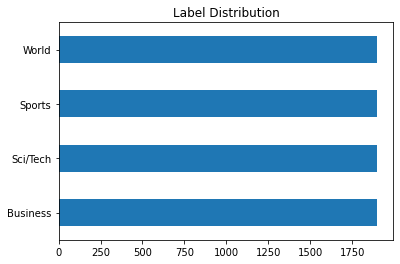

In [ ]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv
import pandas as pd
import pandas as pd 
import nlu
base_df = pd.read_csv('/content/news_category_test.csv').iloc[:10000]
base_df.columns=['y','text']
base_df.y.value_counts().plot.barh(title='Label Distribution')
base_df.head(5)

In [ ]:
## full Configuration for a Data Augmentation Experiment
# Play with these values and see how they influence accuracy

# For Print Logs
sep = '_'*50


# Base Train Dataset Settings
base_dataset=base_df
n_per_class_total = 300 
train_test_frac=0.9
label_col ='y'

# Train Settings
embeddings_to_use=''
epochs=5
learn_rate=0.00005
batch_size=32
droput=0.5


# Text Generation Settings
prompt_label_prefix='-News-Headline:'
slice_len=15
num_aug_per_label=25
gpt2_pipe = nlu.load('gpt2')
gpt2_pipe['gpt2'].setDoSample(True)
gpt2_pipe['gpt2'].setMaxOutputLength(30)
gpt2_pipe['document_assembler'].setCleanupMode('shrink')

learn_rate=0.0005

# Run Experiment
no_aug_fitted_classifier, aug_fitted_classifier = compare_vanilla_and_augmented_training(
  base_dataset=base_dataset,
  generator_model=gpt2_pipe,
  embeddings_to_use=embeddings_to_use,
  n_per_class_total=n_per_class_total,
  train_test_frac=train_test_frac,
  label_col=label_col,
  prompt_label_prefix=prompt_label_prefix,
  slice_len=slice_len,
  num_aug_per_label=num_aug_per_label,
  epochs=epochs,
  learn_rate=learn_rate,
  batch_size=batch_size,
  droput=droput)

# Peformance gain for most classes, nice!
# Some are much worse, we could use vanilla and the augmented model in our final pipeline with a Voting Mechanism on top or tweak more

gpt2 download started this may take some time.
Approximate size to download 442.7 MB
[OK!]
__________________________________________________ Starting Data Augmentation Experiment __________________________________________________
Train Dataset Size = 120
Test Dataset Size = 1080
Training Vanilla Classifier
sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
Training Settings : Epochs=5, learn_rate=0.0005, batch_size=32, dropout=0.5
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
__________________________________________________ Metrics on Train datataset with Vanilla Model __________________________________________________
              precision    recall  f1-score   support

    Business       0.60      0.80      0.69       270
    Sci/Tech       0.84      0.34      0.48       270
      Sports       0.72      0.97      0.83       270
       World       0.82      0.76  

## Data Augmentation on a Finance Dataset

![img](https://www.nasdaq.com/sites/acquia.prod/files/image/29525db076bcc42505a356e55dbe94f38b28530b_getty-stock-market-data.jpg?1540063537)

Using data from https://www.kaggle.com/datasets/yash612/stockmarket-sentiment-dataset 

--2022-09-04 11:41:27--  http://ckl-it.de/wp-content/uploads/2021/02/stock_data.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 758217 (740K) [text/csv]
Saving to: ‘stock_data.csv’

stock_data.csv      100%[===================>] 740.45K  --.-KB/s    in 0.1s    

2022-09-04 11:41:27 (7.14 MB/s) - ‘stock_data.csv’ saved [758217/758217]



,text,y
0,"AAP 950 lot bid in the Feb 580 call at 9.50, might push the stock up or create support. 26 delta option",positive
1,"user: ADBE continues to weaken, not following market. Short on break under 37.60. user",negative
2,pnra missed this one yest on the short side but will short under 50 sma,negative
3,"PPO: 2) GM estimates 20% Y/Y unit growth for volt (36K). great headline, but PPO built capacity for 60K+. this is bad for margins. (2/4)",negative
4,BAC avrg positive2.positive27,positive
5,"CMG While traveling through Kalamazoo, MI on Friday at 6:00, the place was empty. This is the growth hopes for the company. eshorted 325",negative
6,i dont have a tech friend in world that owns the stock ...thats why user: PCN No one Believes anymore :,positive
7,SWI was a beaut,positive
8,"Again, this mkt is FAT while AAP is down 2.5% cratering thru huge psychological level, tells me this tape is strong SPY #dontbeshort",positive
9,APO good volume bounce; entry 22.positive9 stop 20.50,positive


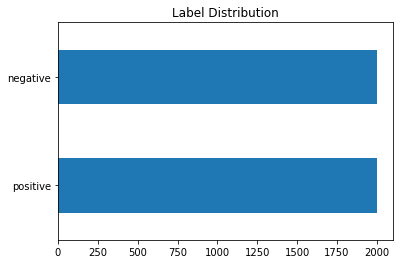

In [ ]:
import pandas as pd
! wget http://ckl-it.de/wp-content/uploads/2021/02/stock_data.csv
# Finance: Twitter Sentiment Data  
# https://www.kaggle.com/datasets/yash612/stockmarket-sentiment-dataset
pd.set_option('max_colwidth', 800)

train_df = pd.read_csv('/content/stock_data.csv')
columns=['text','y']
train_df = train_df[columns]
train_df.y.value_counts().plot.barh(title='Label Distribution')
train_df.head(10)

In [ ]:
# Some Tweaks
prompt_label_prefix='-finance-tweet:'
slice_len=25
num_aug_per_label=30

no_aug_fitted_classifier, aug_fitted_classifier = compare_vanilla_and_augmented_training(
  base_dataset=train_df,
  generator_model=gpt2_pipe,
  embeddings_to_use=embeddings_to_use,
  n_per_class_total=n_per_class_total,
  train_test_frac=train_test_frac,
  label_col=label_col,
  prompt_label_prefix=prompt_label_prefix,
  slice_len=slice_len,
  num_aug_per_label=num_aug_per_label,
  epochs=epochs,
  learn_rate=learn_rate,
  batch_size=batch_size,
  droput=droput)

# Improvement of 1% in 1 class, we could get more with more tweaking

__________________________________________________ Starting Data Augmentation Experiment __________________________________________________
Train Dataset Size = 60
Test Dataset Size = 540
Training Vanilla Classifier
sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
Training Settings : Epochs=5, learn_rate=0.0005, batch_size=32, dropout=0.5
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
__________________________________________________ Metrics on Train datataset with Vanilla Model __________________________________________________
              precision    recall  f1-score   support

    negative       0.55      0.59      0.57       270
    positive       0.55      0.51      0.53       270

    accuracy                           0.55       540
   macro avg       0.55      0.55      0.55       540
weighted avg       0.55      0.55      0.55       540

__________________

## Data Augmentation on a Medical Dataset


Using data from https://www.kaggle.com/datasets/draaslan/covid19-research-papers-dataset?select=papers.csv 

![img](https://law.mpg.de/wp-content/uploads/COVID-19-1920x1080.jpeg)


--2022-09-04 11:43:04--  http://ckl-it.de/wp-content/uploads/2022/09/cleaned_data.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8042091 (7.7M) [text/csv]
Saving to: ‘cleaned_data.csv’

cleaned_data.csv    100%[===================>]   7.67M  42.2MB/s    in 0.2s    

2022-09-04 11:43:04 (42.2 MB/s) - ‘cleaned_data.csv’ saved [8042091/8042091]



,text,y
0,Factors Influencing Sleep Quality among Female Staff Nurses during the Early COVID-19 Pandemic in the United States.,International journal of environmental research and public health
1,Beyond the Pale: Dark Traits and Close Relations Influence Attitudes toward COVID-19 and the Rejection of Quarantine Rules.,International journal of environmental research and public health
2,"COVID-19 Medical Vulnerability Indicators: A Predictive, Local Data Model for Equity in Public Health Decision Making.",International journal of environmental research and public health
3,Physical Activity and Perceived Physical Fitness during the COVID-19 Epidemic: A Population of 40- to 69-Year-Olds in Japan.,International journal of environmental research and public health
4,Lifestyle Effects on the Risk of Transmission of COVID-19 in the United States: Evaluation of Market Segmentation Systems.,International journal of environmental research and public health


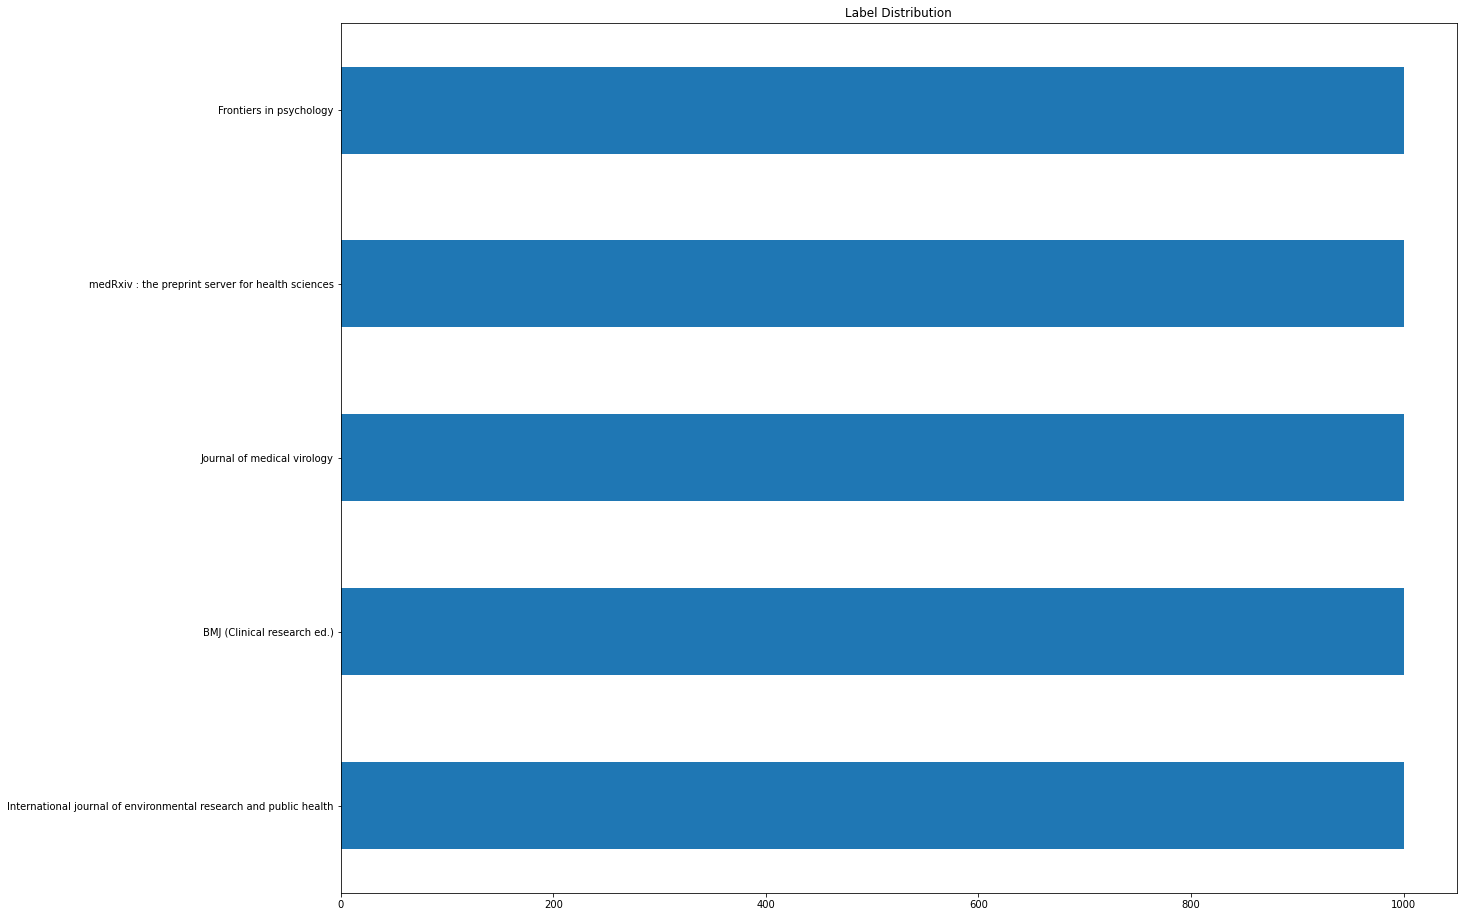

In [ ]:
# Medical Paper Abstract Label Classification
# https://www.kaggle.com/datasets/draaslan/covid19-research-papers-dataset?select=papers.csv 

! wget http://ckl-it.de/wp-content/uploads/2022/09/cleaned_data.csv

train_df = pd.read_csv('cleaned_data.csv')

train_df = train_df[['title','journal']]
train_df.columns = ['text','y']
train_df.y.value_counts().plot.barh(figsize=(20,16), title='Label Distribution')
train_df.head(5)


In [ ]:
# Lets test Augmentation for a Medical Dataset 
num_aug_per_label=25
n_per_class_total = 250
epochs=20
prompt_label_prefix=' reports:'

# Lets make generation a bit longer, since the label is already quite long and it counts into MaxOutputLength
gpt2_pipe['gpt2'].setMaxOutputLength(50)



no_aug_fitted_classifier, aug_fitted_classifier = compare_vanilla_and_augmented_training(
  base_dataset=train_df,
  generator_model=gpt2_pipe,
  embeddings_to_use=embeddings_to_use,
  n_per_class_total=n_per_class_total,
  train_test_frac=train_test_frac,
  label_col=label_col,
  prompt_label_prefix=prompt_label_prefix,
  slice_len=slice_len,
  num_aug_per_label=num_aug_per_label,
  epochs=epochs,
  learn_rate=learn_rate,
  batch_size=batch_size,
  droput=droput)

# Improvements in some classes nice, improvable with tweaking or generating more data

__________________________________________________ Starting Data Augmentation Experiment __________________________________________________
Train Dataset Size = 125
Test Dataset Size = 1125
Training Vanilla Classifier
sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
Training Settings : Epochs=20, learn_rate=0.0005, batch_size=32, dropout=0.5
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
__________________________________________________ Metrics on Train datataset with Vanilla Model __________________________________________________
                                                                   precision    recall  f1-score   support

                                      BMJ (Clinical research ed.)       0.49      0.76      0.60       225
                                          Frontiers in psychology       0.44      0.82      0.58       225
International journa

## Data Augmentation on a Legal Dataset

Using data from  https://www.kaggle.com/datasets/mohammedalrashidan/contracts-clauses-datasets?resource=download

The data source is from was scraped from contracts website where  over 21k legal clauses have been collected from 16 type of clauses that are related to finance

![img](https://media.istockphoto.com/photos/statue-of-lady-justice-and-supreme-court-building-picture-id1140705087?k=20&m=1140705087&s=170667a&w=0&h=qJ7xw7uTfoXdozrzpfeMb4C1UbU7X1cncJV8dCZszWc=)

--2022-09-04 14:42:03--  http://ckl-it.de/wp-content/uploads/2022/09/legal_docs.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13526151 (13M) [text/csv]
Saving to: ‘legal_docs.csv.2’

legal_docs.csv.2    100%[===================>]  12.90M  64.7MB/s    in 0.2s    

2022-09-04 14:42:04 (64.7 MB/s) - ‘legal_docs.csv.2’ saved [13526151/13526151]



,text,y
9327,"During the Employment Period, the Executive s...",base-salary
9328,"During the Employment Period, the Executive s...",base-salary
9329,"During the Term, the Executive’s initial annu...",base-salary
9330,"During the Employment Period, the Executive s...",base-salary
9331,“Base Salary” shall have the meaning set fort...,base-salary
...,...,...
5438,As specified in the Prospectus.,loans
5439,From: Kosmos Energy Finance International (th...,loans
5440,2. The aggregate amount of the proposed Borro...,loans
5441,The Borrower will not make any investment in ...,loans


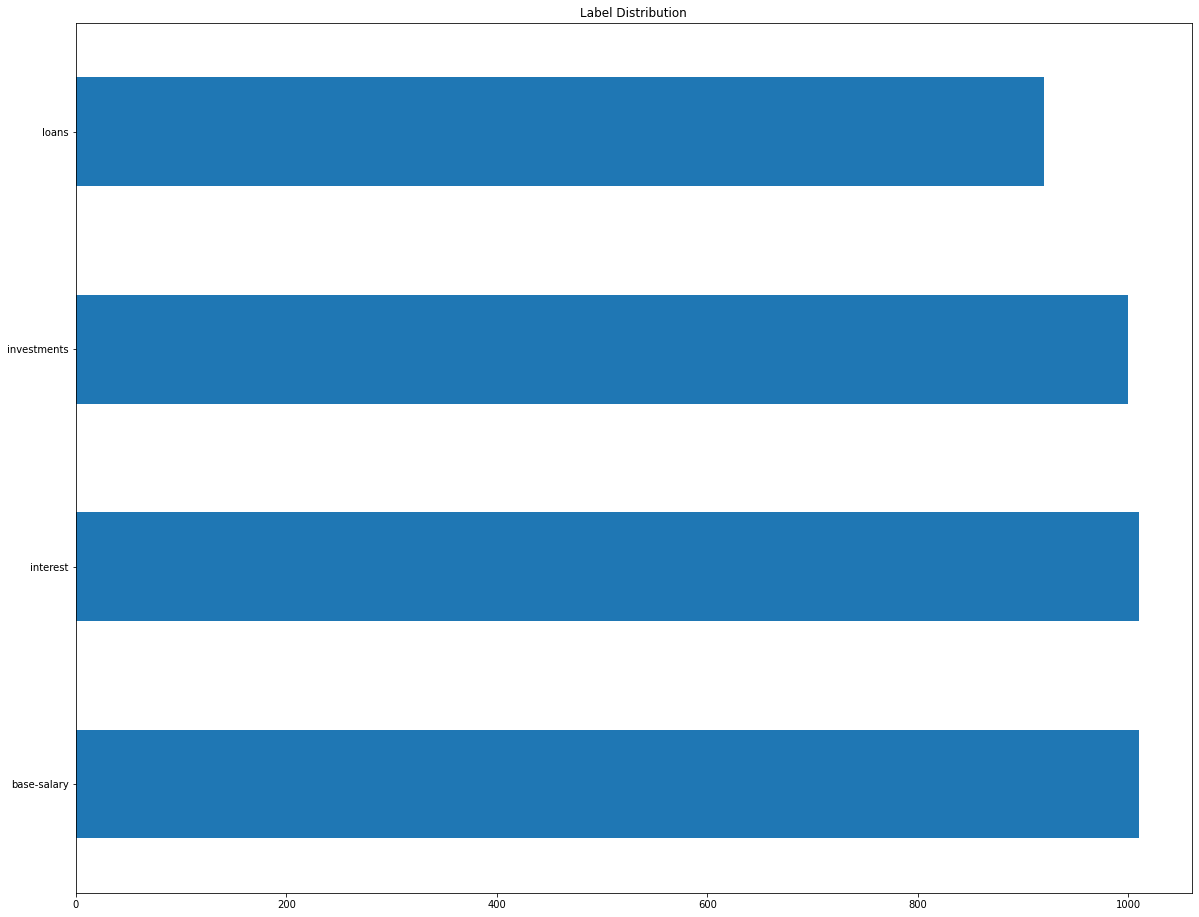

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2022/09/legal_docs.csv
import pandas as pd
train_df = pd.read_csv('/content/legal_docs.csv')
# the text data to use for classification should be in a column named 'text' 
train_df = train_df[['clause_text','clause_type']]
train_df.columns = ['text','y']
train_df


# Lets only keep the first 5 labels for our experiment
shrink_train_df = []
labels_to_keep = ['base-salary', 'interest', 'investments', 'loans']
for label in labels_to_keep:
  shrink_train_df.append(train_df[train_df.y==label])
shrink_train_df = pd.concat(shrink_train_df)
shrink_train_df.y.value_counts().plot.barh(figsize=(20,16), title='Label Distribution')
shrink_train_df


In [ ]:
sep = '_'*50
num_aug_per_label=20
n_per_class_total = 200
epochs=5
gpt2_pipe = nlu.load('gpt2')
gpt2_pipe['gpt2'].setMaxOutputLength(30)
prompt_label_prefix=' contract clause summary:'

no_aug_fitted_classifier, aug_fitted_classifier = compare_vanilla_and_augmented_training(
  base_dataset=shrink_train_df,
  generator_model=gpt2_pipe,
  embeddings_to_use=embeddings_to_use,
  n_per_class_total=n_per_class_total,
  train_test_frac=train_test_frac,
  label_col=label_col,
  prompt_label_prefix=prompt_label_prefix,
  slice_len=slice_len,
  num_aug_per_label=num_aug_per_label,
  epochs=epochs,
  learn_rate=learn_rate,
  batch_size=batch_size,
  droput=droput)
# Strong improvement in some classes, great!

gpt2 download started this may take some time.
Approximate size to download 442.7 MB
[OK!]
__________________________________________________ Starting Data Augmentation Experiment __________________________________________________
Train Dataset Size = 80
Test Dataset Size = 720
Training Vanilla Classifier
sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
Training Settings : Epochs=5, learn_rate=0.0005, batch_size=32, dropout=0.5
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
__________________________________________________ Metrics on Train datataset with Vanilla Model __________________________________________________
              precision    recall  f1-score   support

 base-salary       0.45      0.99      0.62       180
    interest       1.00      0.01      0.02       180
 investments       0.52      0.93      0.67       180
       loans       1.00      0.01    

# There are many more models you can put to use in 1 line of code!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models

### NLU Webinars and Video Tutorials
- [NLU & Streamlit Tutorial](https://vimeo.com/579508034#)
- [Crash course of the 50 + Medical Domains and the 200+ Healtchare models in NLU](https://www.youtube.com/watch?v=gGDsZXt1SF8)
- [Multi Lingual NLU Webinar - Tutorial on Chinese News dataset](https://www.youtube.com/watch?v=ftAOqJuxnV4)
- [John Snow Labs NLU: Become a Data Science Superhero with One Line of Python code](https://events.johnsnowlabs.com/john-snow-labs-nlu-become-a-data-science-superhero-with-one-line-of-python-code?hsCtaTracking=c659363c-2188-4c86-945f-5cfb7b42fcfc%7C8b2b188b-92a3-48ba-ad7e-073b384425b0)
- [Python Web Def Conf - Python's NLU library: 1,000+ Models, 200+ Languages, State of the Art Accuracy, 1 Line of Code](https://2021.pythonwebconf.com/presentations/john-snow-labs-nlu-the-simplicity-of-python-the-power-of-spark-nlp)
- [NYC/DC NLP Meetup with NLU](https://youtu.be/hJR9m3NYnwk?t=2155)

### More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)